In [1]:
import sys
sys.path.append("../util/")

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def phi(v):
    tmp = np.exp(-2*v)
    return (1-tmp)/(1+tmp)

def phi_der(v):
    tmp = np.exp(-2*v)
    return (4*tmp/(1+tmp)**2)

In [3]:
class BackPropagation:
    
    def __init__(self, shape):
        self.mean = float(0.0)
        self.rotation = np.identity(shape[0], dtype="float")
        self.amplitude = np.ones(shape[0])
        self.weights = [np.divide(np.random.randn(shape[i-1], shape[i]), np.sqrt(shape[i])) for i in range(1, len(shape), 1)]
        self.bias = [np.divide(np.random.randn(shape[i]), np.sqrt(shape[i])) for i in range(1, len(shape), 1)]
        return
    
    def fit(self, dataset, eta=0.1, alpha=0.0001, epochs=5):
        # Initialize parameters
        delta = [np.zeros_like(b) for b in self.bias]
        delta_weights = [np.zeros_like(w) for w in self.weights]
        delta_bias = [np.zeros_like(b) for b in self.bias]
        v = [np.zeros_like(b) for b in self.bias]
        y = [np.zeros_like(dataset[0, :2])]
        y.extend([np.zeros_like(b) for b in self.bias])
        # Mean removal
        self.mean = np.mean(dataset[:, :2], axis=0)
        dataset[:, :2] -= self.mean
        # Decorrelation
        self.rotation, self.amplitude, _ = np.linalg.svd(np.cov(dataset[:, :2].T))
        dataset[:, :2] = np.matmul(dataset[:, :2], self.rotation)
        # Covariance equalization
        dataset[:, :2] = np.divide(dataset[:, :2], np.sqrt(self.amplitude))
        # Training start here
        n=0
        for count in range(epochs):
            for example in dataset:
                # Forward calculation
                y[0] = example[:2]
                for (i, w, b) in zip(range(0, len(v), 1), self.weights, self.bias):
                    v[i] = np.add(np.matmul(w.T, y[i]), b)
                    y[i+1] = phi(v[i])
                # Backward calculation
                delta[-1] = np.multiply(phi_der(v[-1]), (example[2]-y[-1]))
                for i in reversed(range(1, len(v), 1)):
                    delta_weights[i] = alpha*delta_weights[i] + np.multiply(eta, np.outer(y[i], delta[i]))
                    self.weights[i] += delta_weights[i]
                    delta_bias[i] = alpha*delta_bias[i] + eta*delta[i]
                    self.bias[i] += delta_bias[i]
                    delta[i-1] = np.multiply(phi_der(v[i-1]), np.matmul(self.weights[i], delta[i]))
                delta_weights[0] = alpha*delta_weights[0] + np.multiply(eta, np.outer(example[:2], delta[0]))
                self.weights[0] += delta_weights[0]
                delta_bias[0] = alpha*delta_bias[0] + eta*delta[0]
                self.bias[0] += delta_bias[0]
                #print("####################")
            n+=1
            eta = 0.1*10/(n+10)
            print("########## End epoch #%d ##########" % count)
        return
    
    def predict(self, example):
        v = [np.zeros_like(b) for b in self.bias]
        y = [example]
        y.extend([np.zeros_like(b) for b in self.bias])
        y[0] -= self.mean
        y[0] = np.matmul(self.rotation.T, y[0])
        y[0] /= np.sqrt(self.amplitude)
        for (i, w, b) in zip(range(0, len(v), 1), self.weights, self.bias):
            v[i] = np.add(np.matmul(w.T, y[i]), b)
            y[i+1] = phi(v[i])
        return y[-1]

########## End epoch #0 ##########
########## End epoch #1 ##########
########## End epoch #2 ##########
########## End epoch #3 ##########
########## End epoch #4 ##########
########## End ##########
[array([[-2.67674412,  1.56813152,  2.84252134,  1.74708415],
       [-0.19170012, -2.36786965,  0.33500291, -1.17028347]]), array([[ 6.86333697e-01, -1.58352115e+00, -2.09637228e+00,
         3.99919007e-02],
       [ 3.17544663e-01,  8.88208454e-02, -1.23226177e+00,
         1.73968310e+00],
       [-2.66445435e+00, -2.17366989e-03,  7.02292870e-01,
         2.99161127e-01],
       [ 3.88679356e-01,  2.74419048e-01,  2.66999306e-01,
         1.50644602e+00]]), array([[-2.22512107],
       [ 0.95058183],
       [ 1.80432322],
       [-2.17103847]])] [array([ 2.14808656,  0.25293164,  2.15141071, -0.05357559]), array([-1.11286975, -0.80435894, -0.46444544, -0.40125148]), array([0.27816151])]


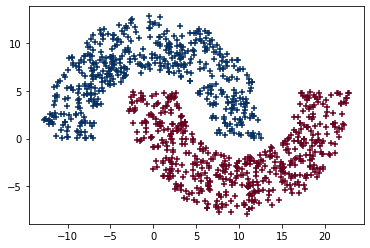

In [4]:
if __name__ == "__main__":
    from ipynb.fs.full.data_generator_2d import double_moon, visualize_data
    dataset = double_moon(1000, d=-5)
    a = BackPropagation([2, 4, 4, 1])
    a.fit(np.copy(dataset))
    print("########## End ##########")
    print(a.weights, a.bias)
    fig = plt.figure()
    ax = fig.subplots(1, 1)
    for example in dataset[:, :2]:
        y = a.predict(np.array(example))
        ax.scatter(example[0], example[1], c=plt.cm.RdBu(np.sign(y)), marker="+")
    #visualize_data(dataset, ax)
    #t = np.linspace(-13, 23, 10)
    #for i in t:
        #for j in t:
            #y = a.predict(np.array([i, j]))
            #ax.scatter(i, j, c=plt.cm.RdBu(np.sign(y)), marker="+")
    plt.show()